<h3> GRIP internship #jun2022 </h3>

# Author : Dadoune fatima ezzahra

# Task 7 : Stock Market Prediction using Numerical and Textual Analysis

# **Step 1: Stock Price Analysis and Prediction**


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, GRU
import math
import os

import csv
path = "C:/Users/azus/Desktop" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)
! pip install matplotlib
! pip install openpyxl

# **Step 1.2 : Importing the Numerical dataset and performing Exploratory Analysis**

In [47]:
# Dataframe for exploratory analysis
df=pd.read_csv('C:/Users/azus/Desktop/data.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476 entries, 0 to 4475
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4476 non-null   object 
 1   Open       4460 non-null   float64
 2   High       4460 non-null   float64
 3   Low        4460 non-null   float64
 4   Close      4460 non-null   float64
 5   Adj Close  4460 non-null   float64
 6   Volume     4460 non-null   float64
dtypes: float64(6), object(1)
memory usage: 244.9+ KB


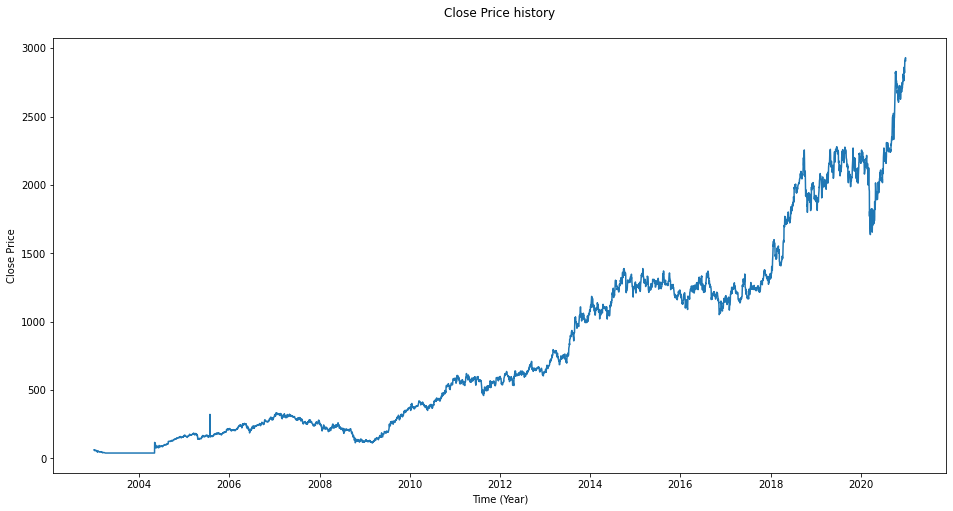

In [49]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%Y')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [50]:
# fix random seed for reproducibility
np.random.seed(7)

# **Step 1.3 : Creating a dataframe for storing the Closing stock data per day**

In [51]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [52]:
df2 = pd.read_csv('C:/Users/azus/Desktop/data.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

# **Step 1.4: Data Normalization and Division into Training and Test sets**

In [53]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [54]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# **Step 1.5 : Creating a GRU Neural Network Model for Numerical Analysis**

In [55]:
# create and fit the LSTM network
model = Sequential()
model.add(GRU(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
597/597 - 2s - loss: 0.0038 - 2s/epoch - 4ms/step
Epoch 2/100
597/597 - 1s - loss: 1.0288e-05 - 853ms/epoch - 1ms/step
Epoch 3/100
597/597 - 1s - loss: 1.0476e-05 - 802ms/epoch - 1ms/step
Epoch 4/100
597/597 - 1s - loss: 1.0810e-05 - 841ms/epoch - 1ms/step
Epoch 5/100
597/597 - 1s - loss: 1.1436e-05 - 1s/epoch - 2ms/step
Epoch 6/100
597/597 - 2s - loss: 1.1057e-05 - 2s/epoch - 3ms/step
Epoch 7/100
597/597 - 2s - loss: 1.1276e-05 - 2s/epoch - 4ms/step
Epoch 8/100
597/597 - 1s - loss: 1.2299e-05 - 869ms/epoch - 1ms/step
Epoch 9/100
597/597 - 1s - loss: 1.1462e-05 - 872ms/epoch - 1ms/step
Epoch 10/100
597/597 - 1s - loss: 1.3404e-05 - 801ms/epoch - 1ms/step
Epoch 11/100
597/597 - 1s - loss: 1.2193e-05 - 828ms/epoch - 1ms/step
Epoch 12/100
597/597 - 1s - loss: 1.2915e-05 - 849ms/epoch - 1ms/step
Epoch 13/100
597/597 - 1s - loss: 1.2463e-05 - 813ms/epoch - 1ms/step
Epoch 14/100
597/597 - 1s - loss: 1.3035e-05 - 796ms/epoch - 1ms/step
Epoch 15/100
597/597 - 1s - loss: 1.2300e-05 

# **Step 1.6 : Making Predictions of the Model**

In [56]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

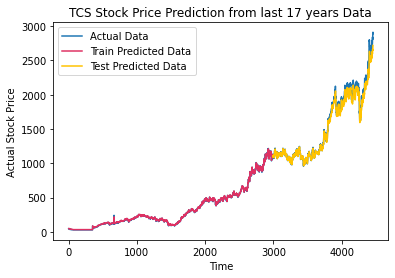

In [57]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('TCS Stock Price Prediction from last 17 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [58]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")


Root mean square error of Training  =  8.819961404435846  RMSE
Root mean square error of Testing =  52.036515286563784  RMSE


# **Step 2: Textual Data(News Headlines) Analysis**

# **Step 2.1:  Importing Required Libraries for Textual (News Headlines) analysis**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# **Step 2.2 : Importing the Textual dataset and performing Exploratory Analysis**

In [60]:
data = pd.read_csv('C:/Users/azus/Desktop/india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [61]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3650965     True
3650966     True
3650967     True
3650968     True
3650969     True
Name: publish_date, Length: 3650970, dtype: bool

In [62]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [63]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7717 non-null   int64 
 1   Date               7717 non-null   int64 
 2   headline_category  7717 non-null   object
 3   headline_text      7717 non-null   object
dtypes: int64(2), object(2)
memory usage: 241.3+ KB


In [65]:
data['headline_category'].value_counts()

unknown                                  987
entertainment.hindi.bollywood            732
india                                    343
life-style.relationships.man-woman       332
edit-page                                256
                                        ... 
shobhaa-de.politically-incorrect           1
city.jammu                                 1
friendship-day                             1
entertainment.marathi.movies.previews      1
astrology.horoscope.yearly                 1
Name: headline_category, Length: 330, dtype: int64

In [66]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data

,index,Date,headline_category,headline_text
8,642,20010110,city.patna,Fend for yourselves; Pande tells doctors
48,2215,20010309,city.delhi,Maneka asks govt to take back land for cow she...
114,4563,20010522,city.pune,She turned and fought
116,4693,20010527,city.bengaluru,Need to boost exports; says bank head
118,4917,20010529,city.bengaluru,US visit won't be piece of cake for Krishna
...,...,...,...,...
7700,3642496,20220315,city.mumbai,Mumbaikars enjoy nightlife once more as restau...
7703,3643993,20220318,city.mumbai,Mumbai salons and spas deal with heavy demand ...
7707,3645983,20220322,city.patna,Sikta MLA pleads for police reform
7710,3647476,20220325,city.delhi,Speeding up; shortcuts and tackling unruly cus...


In [67]:
city_split = pd.DataFrame(columns=['city_name'])

In [68]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

In [69]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [70]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

In [71]:
# re-setting the index
city_data.reset_index(inplace=True)

In [72]:
# see the final data which contain city_name column
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,20010110,Fend for yourselves; Pande tells doctors,patna
1,48,2215,20010309,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,20010522,She turned and fought,pune
3,116,4693,20010527,Need to boost exports; says bank head,bengaluru
4,118,4917,20010529,US visit won't be piece of cake for Krishna,bengaluru


In [73]:
city_data.drop(['level_0', 'index'],axis=1)

,Date,headline_text,city_name
0,20010110,Fend for yourselves; Pande tells doctors,patna
1,20010309,Maneka asks govt to take back land for cow she...,delhi
2,20010522,She turned and fought,pune
3,20010527,Need to boost exports; says bank head,bengaluru
4,20010529,US visit won't be piece of cake for Krishna,bengaluru
...,...,...,...
1412,20220315,Mumbaikars enjoy nightlife once more as restau...,mumbai
1413,20220318,Mumbai salons and spas deal with heavy demand ...,mumbai
1414,20220322,Sikta MLA pleads for police reform,patna
1415,20220325,Speeding up; shortcuts and tackling unruly cus...,delhi


In [74]:
# there are so many cities which we can see
city_data.city_name.unique()

array(['patna', 'delhi', 'pune', 'bengaluru', 'ahmedabad', 'mumbai',
       'thiruvananthapuram', 'kolkata', 'hyderabad', 'lucknow',
       'chandigarh', 'goa', 'nagpur', 'guwahati', 'rajkot', 'bhubaneswar',
       'surat', 'allahabad', 'varanasi', 'vadodara', 'mangaluru',
       'ranchi', 'jaipur', 'ludhiana', 'mysuru', 'kanpur', 'thane',
       'hubballi', 'kochi', 'navimumbai', 'gurgaon', 'indore', 'kolhapur',
       'agartala', 'madurai', 'bareilly', 'aurangabad', 'meerut',
       'visakhapatnam', 'trichy', 'coimbatore', 'jammu', 'dehradun',
       'nashik', 'noida', 'puducherry', 'erode', 'chennai', 'jind',
       'ghaziabad', 'bhopal', 'jamshedpur', 'vijayawada', 'agra',
       'shimla', 'amritsar'], dtype=object)

# **Step 2.3: Representing number of headline text (News Headline) per city**

In [75]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

In [76]:
#for better understanding remane the column
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)

In [77]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73
chandigarh,59
goa,57


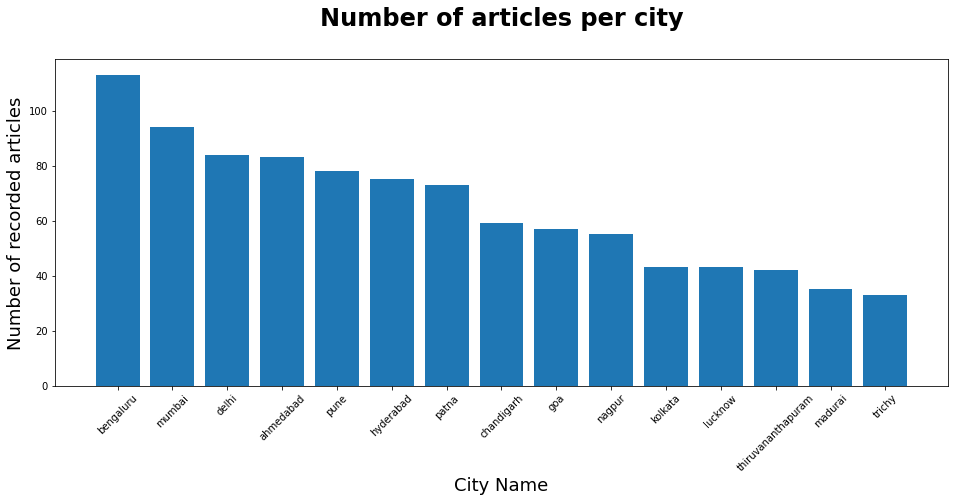

In [78]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(16,6))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

# **Step 2.4: Representing Number of News Headlines per year and per city**

In [79]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

,level_0,index,Date,headline_text,city_name
0,8,642,1970-01-01 00:00:00.020010110,Fend for yourselves; Pande tells doctors,patna
1,48,2215,1970-01-01 00:00:00.020010309,Maneka asks govt to take back land for cow she...,delhi
2,114,4563,1970-01-01 00:00:00.020010522,She turned and fought,pune
3,116,4693,1970-01-01 00:00:00.020010527,Need to boost exports; says bank head,bengaluru
4,118,4917,1970-01-01 00:00:00.020010529,US visit won't be piece of cake for Krishna,bengaluru


In [80]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [81]:
# dropping unnecessary columns
city_data.drop(columns=['Date','index'],axis=1,inplace=True)

In [82]:
# final result
city_data.head()

,level_0,headline_text,city_name,Year
0,8,Fend for yourselves; Pande tells doctors,patna,1970
1,48,Maneka asks govt to take back land for cow she...,delhi,1970
2,114,She turned and fought,pune,1970
3,116,Need to boost exports; says bank head,bengaluru,1970
4,118,US visit won't be piece of cake for Krishna,bengaluru,1970


In [83]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1

In [84]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [85]:
city_data_2.head()

,level_0,city_name,Year,Number_of_headline_text
0,8,patna,1970,1
1,48,delhi,1970,1
2,114,pune,1970,1
3,116,bengaluru,1970,1
4,118,bengaluru,1970,1


In [86]:
top_15_headline_city.head(7)

,Number_of_headline_text
city_name,
bengaluru,113
mumbai,94
delhi,84
ahmedabad,83
pune,78
hyderabad,75
patna,73


In [87]:
# creating new data_set for top 7 cities with year 
city_luck = city_data_2[city_data_2.city_name == 'luck']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_del = city_data_2[city_data_2.city_name == 'delhi']


In [88]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_luck]
data_famous_cities = pd.concat(famous_cities)

In [89]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)

In [90]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(527, 5)


,index,level_0,city_name,Year,Number_of_headline_text
0,3,116,bengaluru,1970,1
1,4,118,bengaluru,1970,1
2,5,119,bengaluru,1970,1
3,7,135,bengaluru,1970,1
4,10,138,bengaluru,1970,1


In [91]:
data_famous_cities=data_famous_cities.drop(['level_0'],axis=1)
data_famous_cities.head()

,index,city_name,Year,Number_of_headline_text
0,3,bengaluru,1970,1
1,4,bengaluru,1970,1
2,5,bengaluru,1970,1
3,7,bengaluru,1970,1
4,10,bengaluru,1970,1


In [92]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()

In [93]:
city_count.head()

city_name,ahmedabad,bengaluru,delhi,hyderabad,mumbai,pune
Year,,,,,,
1970,83,113,84,75,94,78


In [94]:
city_year_count.head()

Year
1970    1417
Name: Number_of_headline_text, dtype: int64

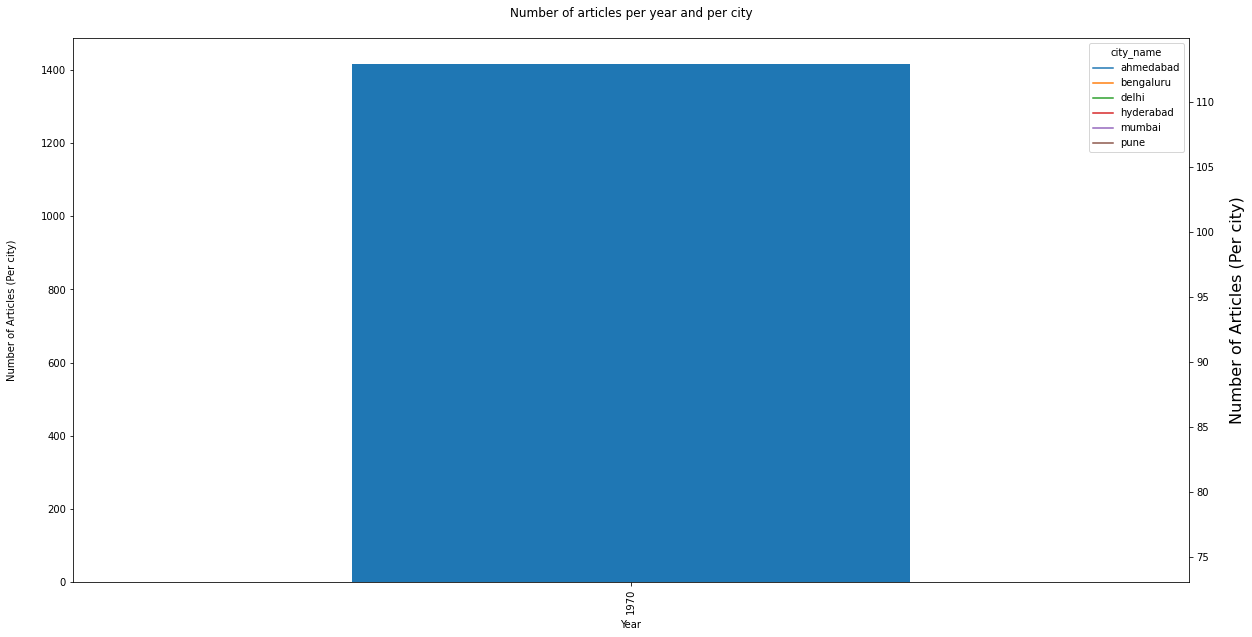

<Figure size 1440x720 with 0 Axes>

In [95]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

# **Step 2.5: Sentiment Analysis of News Headlines**

In [96]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [ ]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,289
neutral,2636
positive,707


In [ ]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    19.465859
Name: positive, dtype: float64


Negative Headlines:  headline_text    7.957048
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    72.577093
Name: neutral, dtype: float64


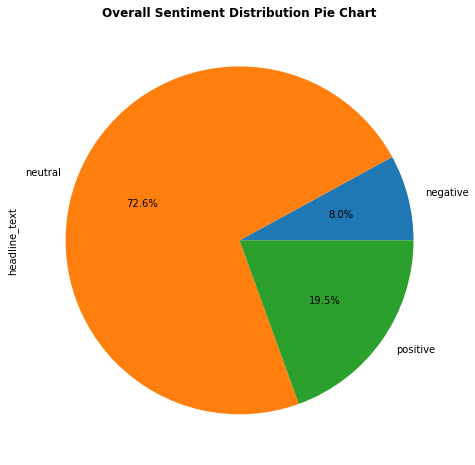

In [ ]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

# **Step 3: Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines**

# **Step 3.1: Importing Required Libraries**

In [ ]:
!pip install vaderSentiment

In [ ]:
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Step 3.2 : Importing the Numerical and Textual dataset**

In [ ]:
stock_data=pd.read_csv('C:/Users/azus/Desktop/data.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0
1,02-01-2003,61.525002,62.924999,57.912498,58.299999,43.443855,5325328.0
2,03-01-2003,60.000000,61.049999,58.500000,59.012501,43.974789,4198040.0
3,06-01-2003,59.924999,60.187500,56.875000,57.262501,42.670746,4121520.0
4,07-01-2003,58.000000,58.500000,56.062500,56.599998,42.177040,2650800.0


In [ ]:
news_data=pd.read_csv('/content/drive/MyDrive/The Sparks Foundation/dataset/india-news-headlines.csv')
news_data.head()

,publish_date,headline_category,headline_text
0,02-01-2001,unknown,Status quo will not be disturbed at Ayodhya; s...
1,02-01-2001,unknown,Fissures in Hurriyat over Pak visit
2,02-01-2001,unknown,America's unwanted heading for India?
3,02-01-2001,unknown,For bigwigs; it is destination Goa
4,02-01-2001,unknown,Extra buses to clear tourist traffic


In [ ]:
news_data.rename(columns={'publish_date': 'Date'},inplace = True)
news_data.head()

,Date,headline_category,headline_text
0,02-01-2001,unknown,Status quo will not be disturbed at Ayodhya; s...
1,02-01-2001,unknown,Fissures in Hurriyat over Pak visit
2,02-01-2001,unknown,America's unwanted heading for India?
3,02-01-2001,unknown,For bigwigs; it is destination Goa
4,02-01-2001,unknown,Extra buses to clear tourist traffic


# **Step 3.3: Creating Hybrid data from Numerical and Textual Data**

In [ ]:
hybrid_data = pd.merge(stock_data,news_data, 
                   on='Date', 
                   how ='inner',
                   left_index = True)

In [ ]:
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today


# **Step 3.4: Performing Sentiment Analysis on Hybrid Data**

## **Step 3.4.1: Sentiment Analysis using TextBlob**

In [ ]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral


In [ ]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [ ]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

In [ ]:
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral,1,0
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive,0,1
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral,1,0
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral,1,0
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral,1,0


## **Step 3.4.2: Adding subjectivity and polarity Scores to Textual Data (News Headlines)**

In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral,1,0,0.000000,0.000000
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive,0,1,0.454545,0.136364
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral,1,0,0.066667,0.000000
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral,1,0,0.000000,0.000000
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral,1,0,0.000000,0.000000


## **Step 3.4.3: Visualizing the polarity and Subjectivity scores**


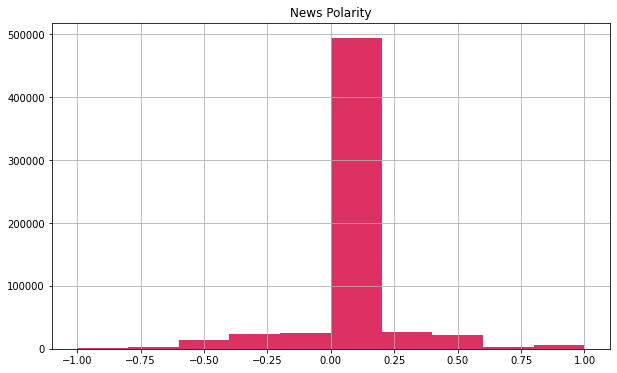

In [ ]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist(color = '#DE3163')

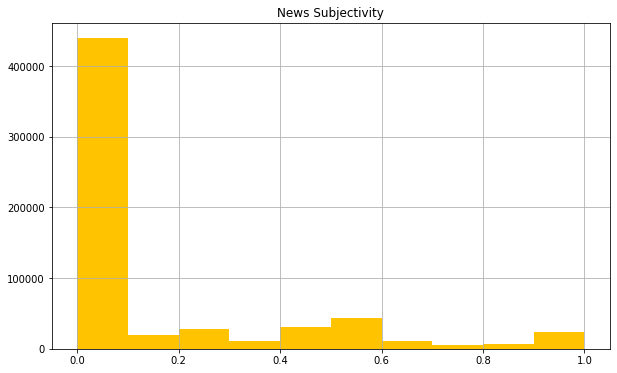

In [ ]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist(color = '#FFC300')

## **Step 3.4.4 : Performing Sentiment Analysis over the news Headlines of Hybrid Data**

In [ ]:
#Adding sentiment score to news
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
172470,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Chastened BCC members decide to mend ways,neutral,1,0,0.000000,0.000000,0.0000,0.000,1.000,0.000
172471,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,New look for slums; govt to start work,positive,0,1,0.454545,0.136364,0.0000,0.000,1.000,0.000
172472,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Global spiritual meet to begin from Jan. 16,neutral,1,0,0.066667,0.000000,0.0000,0.000,1.000,0.000
172473,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Parameshwara allays fears of scrapping CET,neutral,1,0,0.000000,0.000000,-0.4215,0.359,0.641,0.000
172474,01-01-2003,59.987499,61.974998,59.987499,61.087502,45.521038,6027072.0,city.bengaluru,Amusement park opens today,neutral,1,0,0.000000,0.000000,0.3612,0.000,0.545,0.455


In [ ]:
hybrid_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [ ]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']

In [ ]:
new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [ ]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_hybrid.head()

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,172470,59.987499,61.974998,59.987499,6027072.0,0.0000,0.000,1.000,0.000,0
1,172471,59.987499,61.974998,59.987499,6027072.0,0.0000,0.000,1.000,0.000,1
2,172472,59.987499,61.974998,59.987499,6027072.0,0.0000,0.000,1.000,0.000,0
3,172473,59.987499,61.974998,59.987499,6027072.0,-0.4215,0.359,0.641,0.000,0
4,172474,59.987499,61.974998,59.987499,6027072.0,0.3612,0.000,0.545,0.455,0


In [ ]:
new_hybrid.shape

(620155, 10)

# **Step 3.5: Training and Testing the Models for Stock Price/Performance Analysis**

In [ ]:
X = new_hybrid.drop('Label', axis=1)    

y = new_hybrid['Label']  

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [ ]:
np.any(np.isnan(x_train)) 

True

In [ ]:
np.all(np.isfinite(x_train)) 

False

In [ ]:
x_train = x_train.fillna(x_train.mean())

In [ ]:
x_test=x_test.fillna(x_test.mean())

## **Step 3.5.1: Stock Price/Performance analysis using Logistic Regressor Model**

In [ ]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
accuracy_score(y_test,y_logit_pred)

0.8322032395127025

## **Step 3.5.2: Stock Price/Performance analysis using Random Forest Model**

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
accuracy_score(y_test,y_rf_pred)

0.8119986132499133

## **Step 3.5.3 : Stock Price/Performance analysis using Decision Tree Model**

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
accuracy_score(y_test,y_dt_pred)

0.7930759245672453

## **Step 3.5.4 : Stock Price/Performance analysis using Linear Discriminant Analyser Model**

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_lda_pred = lda.predict(x_test)
accuracy_score(y_test,y_lda_pred)

0.834484927155308

## **Step 3.5.5 : Stock Price/Performance analysis using AdaBoost Model**

In [ ]:
adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
y_adb_pred = adb.predict(x_test)
accuracy_score(y_test,y_adb_pred)

0.8535849908490619

## **Step 3.5.6: Stock Price/Performance analysis using Logistic Gradient Boosting Model**

In [ ]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
accuracy_score(y_test,y_xgb_pred)


0.855213615950851

In [ ]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_test,y_logit_pred)*100,"%")
print("Accuracy of Random forest Model      : ",accuracy_score(y_test,y_rf_pred)*100,"%")
print("Accuracy of Decision Tree Model      : ",accuracy_score(y_test,y_dt_pred)*100,"%")
print("Accuracy of Linear Discriminant Mode  : ",accuracy_score(y_test,y_lda_pred)*100,"%")
print("Accuracy of AdaBoost Model           : ",accuracy_score(y_test,y_adb_pred)*100,"%")
print("Accuracy of Gradient Boosting Model  : ",accuracy_score(y_test,y_xgb_pred)*100,"%")

Accuracy of Logistic Regression Model:  83.22032395127025 %
Accuracy of Random forest Model      :  81.19986132499133 %
Accuracy of Decision Tree Model      :  79.30759245672454 %
Accuracy of Linear Discriminant Mode  :  83.4484927155308 %
Accuracy of AdaBoost Model           :  85.35849908490619 %
Accuracy of Gradient Boosting Model  :  85.5213615950851 %
